In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import nltk
import re

In [6]:
train=pd.read_csv('train_tweet.csv')
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [7]:
test=pd.read_csv('test_tweet.csv')
test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
id       31962 non-null int64
label    31962 non-null int64
tweet    31962 non-null object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [22]:
train.label.value_counts()

0    29720
1     2242
Name: label, dtype: int64

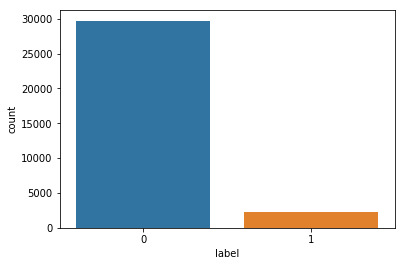

In [21]:
sns.countplot(train['label'])
plt.show()

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17197 entries, 0 to 17196
Data columns (total 2 columns):
id       17197 non-null int64
tweet    17197 non-null object
dtypes: int64(1), object(1)
memory usage: 268.8+ KB


In [11]:
comb=train.append(test, sort=True)
comb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49159 entries, 0 to 17196
Data columns (total 3 columns):
id       49159 non-null int64
label    31962 non-null float64
tweet    49159 non-null object
dtypes: float64(1), int64(1), object(1)
memory usage: 1.5+ MB


In [12]:
comb.head()

,id,label,tweet
0,1,0.0,@user when a father is dysfunctional and is s...
1,2,0.0,@user @user thanks for #lyft credit i can't us...
2,3,0.0,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation


In [13]:
comb.tail()

,id,label,tweet
17192,49155,NaN,thought factory: left-right polarisation! #tru...
17193,49156,NaN,feeling like a mermaid ð #hairflip #neverre...
17194,49157,NaN,#hillary #campaigned today in #ohio((omg)) &am...
17195,49158,NaN,"happy, at work conference: right mindset leads..."
17196,49159,NaN,"my song ""so glad"" free download! #shoegaze ..."


In [18]:
def remove_pattern(input_txt , pattern):
    r=re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt  

In [23]:
comb['filtered_tweet']=np.vectorize(remove_pattern)(comb.tweet,"@[\w]*")
comb.head(10)

,id,label,tweet,filtered_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before the...,[2/2] huge fan fare and big talking before the...
6,7,0.0,@user camping tomorrow @user @user @user @use...,camping tomorrow dannyâ¦
7,8,0.0,the next school year is the year for exams.ð...,the next school year is the year for exams.ð...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,we won!!! love the land!!! #allin #cavs #champ...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,welcome here ! i'm it's so #gr8 !


In [29]:
comb['filtered_tweet'] = comb['filtered_tweet'].str.replace("[^a-zA-Z#]", " ")
comb.head(10)


,id,label,tweet,filtered_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before the...,huge fan fare and big talking before the...
6,7,0.0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny
7,8,0.0,the next school year is the year for exams.ð...,the next school year is the year for exams ...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,we won love the land #allin #cavs #champ...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,welcome here i m it s so #gr


In [30]:
comb['filtered_tweet'] = comb['filtered_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
comb.head(10)

,id,label,tweet,filtered_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation
5,6,0.0,[2/2] huge fan fare and big talking before the...,huge fare talking before they leave chaos disp...
6,7,0.0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny
7,8,0.0,the next school year is the year for exams.ð...,next school year year exams think about that #...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,love land #allin #cavs #champions #cleveland #...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,welcome here


In [34]:

def gen_freq(text):
    #Will store the list of words
    word_list = []

    #Loop over all the tweets and extract words into word_list
    for tw_words in text.split():
        word_list.extend(tw_words)

    #Create word frequencies using word_list
    word_freq = pd.Series(word_list).value_counts()

    #Print top 20 words
    word_freq[:20]
    
    return word_freq


In [35]:
gen_freq(comb.filtered_tweet.str)

this                    4126
with                    3864
that                    3192
your                    2637
have                    2483
happy                   2450
#love                   2366
just                    2099
will                    1949
love                    1906
when                    1892
what                    1836
time                    1709
from                    1642
today                   1566
like                    1501
about                   1333
#positive               1331
they                    1325
people                  1249
good                    1219
more                    1130
life                    1126
want                     986
take                     938
bihday                   916
#healthy                 900
there                    868
make                     847
#smile                   826
                        ... 
slug                       1
#bedtimewalk               1
#quest                     1
#mangara      

In [37]:
tokenized_tweet = comb['filtered_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: filtered_tweet, dtype: object

In [38]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head(10)

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, caus, they, offer, whee...
2                              [bihday, your, majesti]
3                     [#model, love, take, with, time]
4                         [factsguid, societi, #motiv]
5    [huge, fare, talk, befor, they, leav, chao, di...
6                              [camp, tomorrow, danni]
7    [next, school, year, year, exam, think, about,...
8    [love, land, #allin, #cav, #champion, #clevela...
9                                       [welcom, here]
Name: filtered_tweet, dtype: object

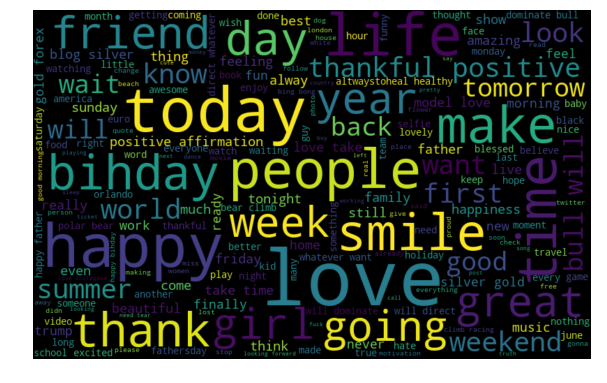

In [40]:
all_words = ' '.join([text for text in comb['filtered_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


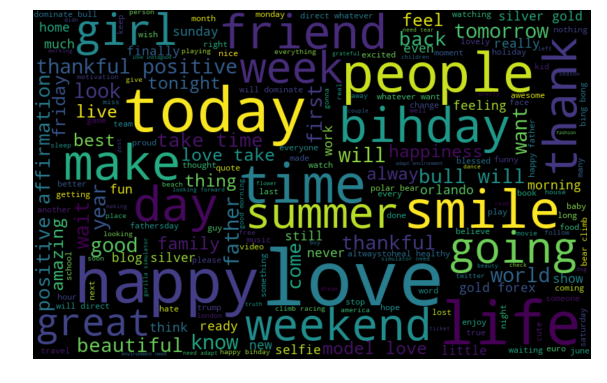

In [41]:
normal_words =' '.join([text for text in comb['filtered_tweet'][comb['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

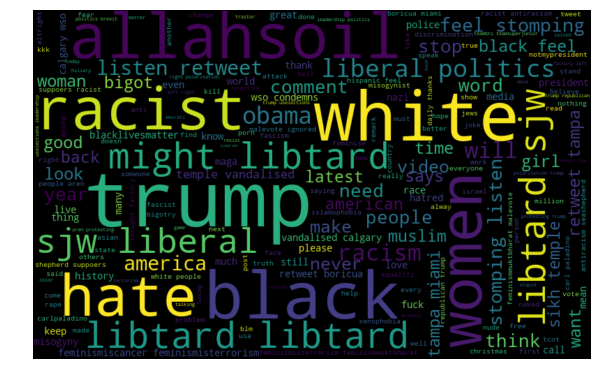

In [42]:
normal_words =' '.join([text for text in comb['filtered_tweet'][comb['label'] == 1]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [43]:
def hashtag_extract(text):
    hash1=[]
    for i in text:
        h = re.findall(r"#(\w+)", i)
        hash1.append(h)

    return hash1

In [45]:
positive_tags=hashtag_extract(comb.filtered_tweet[comb.label==0])
negative_tags=hashtag_extract(comb.filtered_tweet[comb.label==1])
positive_tags= sum(positive_tags,[])
negative_tags = sum(negative_tags,[])

In [49]:
b = nltk.FreqDist(positive_tags)
b

FreqDist({'love': 1596, 'positive': 880, 'smile': 581, 'healthy': 576, 'thankful': 496, 'fun': 463, 'life': 431, 'summer': 395, 'model': 365, 'cute': 365, ...})

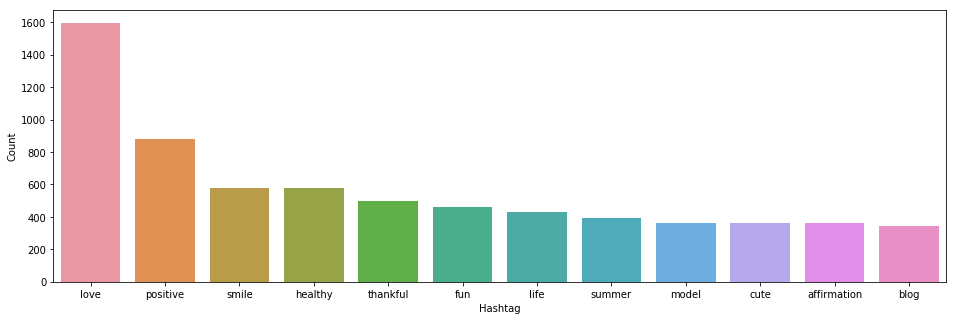

In [57]:
d = pd.DataFrame({'Hashtag': list(b.keys()),
                  'Count': list(b.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 12) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [51]:
a = nltk.FreqDist(negative_tags)
a

FreqDist({'trump': 136, 'politics': 95, 'allahsoil': 92, 'libtard': 76, 'liberal': 75, 'sjw': 74, 'retweet': 63, 'miami': 46, 'black': 44, 'hate': 33, ...})

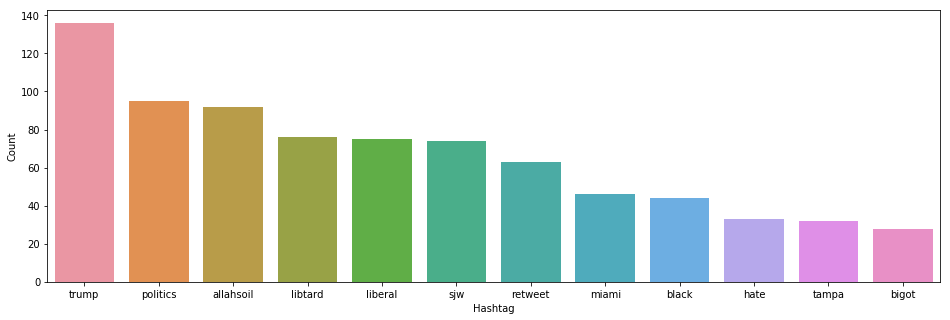

In [58]:
d=pd.DataFrame({'Hashtag':list(a.keys()), 'Count':list(a.values())})
d = d.nlargest(columns="Count", n = 12) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [59]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(comb['filtered_tweet'])

In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(comb['filtered_tweet'])

In [62]:
print(bow.shape)
print(tfidf.shape)

(49159, 1000)
(49159, 1000)


In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

X=bow[:31962,:]
y=train.label

xtrain, xtest, ytrain, ytest = train_test_split(X, y, random_state=42, test_size=0.3)

lreg = LogisticRegression()
lreg.fit(xtrain, ytrain)

prediction = lreg.predict_proba(xtest)
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int)


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


NameError: name 'yvalid' is not defined

In [66]:
prediction

array([[9.99404290e-01, 5.95709562e-04],
       [9.82226241e-01, 1.77737589e-02],
       [9.78186890e-01, 2.18131102e-02],
       ...,
       [9.44929407e-01, 5.50705926e-02],
       [9.39501811e-01, 6.04981888e-02],
       [9.63274184e-01, 3.67258165e-02]])

In [67]:
prediction_int = prediction.astype(np.int)

In [68]:
prediction_int

array([[0, 0],
       [0, 0],
       [0, 0],
       ...,
       [0, 0],
       [0, 0],
       [0, 0]])